<div class="alert block-alert alert-success">
<h1>Домашнее задание 4.1</h1>
</div>

# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

---

## Задание 1. Выбери окно конверсии, используя исторические данные 

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`
    
   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.
   
   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты. 

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv('investigate_window.csv')

In [3]:
historical_data.head()

,Unnamed: 0,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
# проверяю, выводятся ли даты в формате datetime. Если нет — исправляю 

historical_data.dtypes

Unnamed: 0               int64
user_id                  int64
main_page_viewed_at     object
order_completed_at      object
time_to_order          float64
dtype: object

In [5]:
# конвертирую str в datetime

historical_data[['main_page_viewed_at','order_completed_at']] = \
historical_data[['main_page_viewed_at','order_completed_at']]\
.apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') # format и errors можно не указывать

In [6]:
# а лучше вообще это сделать при загрузке данных и заодно преобразовать первый столбец в индекс

date_columns = ['main_page_viewed_at', 'order_completed_at']
historical_data = pd.read_csv('investigate_window.csv', parse_dates=date_columns, index_col = 0)

In [7]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [8]:
# проверяю, выводятся ли даты в формате datetime

historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии? 
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии. 
   - Округли значение до 1 знака после запятой.

In [9]:
import numpy as np

In [10]:
perc_95 = round(np.percentile(historical_data['time_to_order'], 95), 1) # соответствует недельному окну конверсии
perc_95

7.1

In [11]:
perc_90 = np.percentile(historical_data['time_to_order'], 90)
perc_90

2.864949845679016

In [12]:
perc_85 = np.percentile(historical_data['time_to_order'], 85)
perc_85

1.9903886959876524

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля. 
   - Выведи значение перцентиля в легенду. 
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

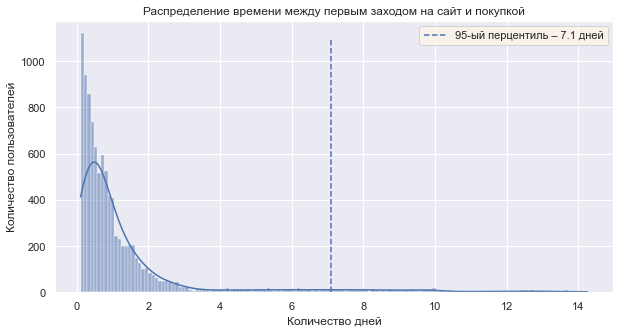

In [14]:
# строю гистограмму

sns.set() # устанавливаю тему Seaborn по умолчанию

fig, ax = plt.subplots(figsize=(10,5)) # тоже самое, что двумя строчками ниже
# fig = plt.figure(figsize=(10,5))     # создаю "Figure"
# ax = fig.add_subplot(111)            # создаю "Axes"

sns.histplot(historical_data['time_to_order'], kde=True) # рисую гистограмму и график области ядра распределения
ax.vlines(perc_95, ymin = 0, ymax = 1100, linestyles = 'dashed', label = f'95-ый перцентиль – {perc_95} дней')
ax.set(title = 'Распределение времени между первым заходом на сайт и покупкой',
       xlabel = 'Количество дней',
       ylabel = 'Количество пользователей')

# можно задавать размеры области Figure так:
# fig.set_figwidth(8)     #  ширина и
# fig.set_figheight(8)    #  высота "Figure"

ax.legend(facecolor = 'oldlace')
plt.show()

---

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [15]:
# подлючу данные теста

data = pd.read_csv('bakery_ab_test.csv', index_col = 0)

In [16]:
data.head()

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [17]:
# функция построения диаграммы распределения пользователей по сегментам внутри каждой тестовой группы

def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    palette = sns.color_palette(['turquoise', 'mediumorchid']),
                    hue = test_factor, # разные группы будут иметь разный цвет
                    data = aggregated_data, 
                    kind = "bar",      # строю солбчатую диаграмму
                    height = 4,        # размер графика 
                    aspect = 1.5)      # ширина столбца

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

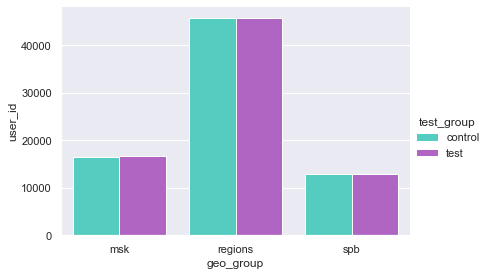

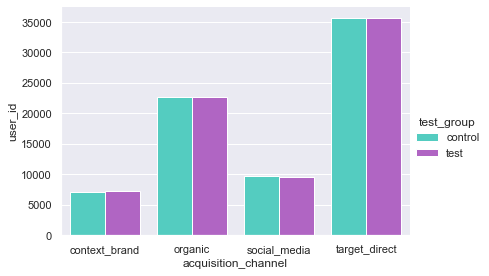

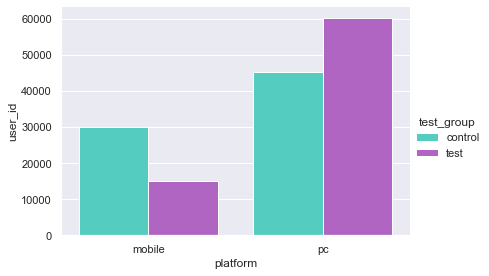

In [18]:
# смотрю графики распределения

plot_segments_distribution(data,                                             #датафрейм
                           ['geo_group', 'acquisition_channel', 'platform'], #сегменты
                           'test_group')                                     #тест-фактор

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Сплитирование по региону и каналу привлечения - идеальные,<br>  
по используемой платформе - требует пересмотра
</div>

---

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [19]:
data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [20]:
# создаю таблицу для metrics_pc

metrics_pc = data.loc[data['platform'] == 'pc']\
    .groupby('test_group', as_index= False)\
    .aggregate({'user_id': 'count', 'within_window': 'sum', 'purchase_amount': 'mean'}) # средняя сумма покупки
metrics_pc['conversion'] = round(metrics_pc['within_window']/metrics_pc['user_id']*100, 2) # конверсия
metrics_pc

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121803,30.44
1,test,60317,19659,5401.003720,32.59


In [21]:
# тоже самое делаю для metrics_mobile

metrics_mobile = data.loc[data['platform'] == 'mobile']\
    .groupby('test_group', as_index= False)\
    .aggregate({'user_id': 'count', 'within_window': 'sum', 'purchase_amount': 'mean'}) # средняя сумма покупки
metrics_mobile['conversion'] = round(metrics_mobile['within_window']/metrics_mobile['user_id']*100, 2) # конверсия
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505438,30.79
1,test,14956,4768,5369.075812,31.88


In [22]:
# тоже самое делаю для обеих платформ

metrics = data.groupby('test_group', as_index= False)\
    .aggregate({'user_id': 'count', 'within_window': 'sum', 'purchase_amount': 'mean'}) # средняя сумма покупки
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2) # конверсия
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,30.58
1,test,75273,24427,5394.771589,32.45


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [23]:
import statsmodels.stats.proportion as proportion

In [24]:
# посчитаю p-value для обеих платформ

chi2stat, pval, table =\
proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])
pval

5.321539863368111e-15

In [25]:
# посчитаю p-value для PC

chi2stat_pc, pval_pc, table_pc =\
proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
pval_pc

1.0436637877855105e-13

In [26]:
# посчитаю p-value для Mobile

chi2stat_mobile, pval_mobile, table_mobile =\
proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
pval_mobile

0.018202784051985058

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [27]:
# уровень значимости

alpha = 0.05
print(f'Статистически значимая разница в конверсии для обеих платформ =  {pval < alpha}')
print(f'Статистически значимая разница в конверсии для PC =  {pval_pc < alpha}')
print(f'Статистически значимая разница в конверсии для Mobil =  {pval_mobile < alpha}')

Статистически значимая разница в конверсии для обеих платформ =  True
Статистически значимая разница в конверсии для PC =  True
Статистически значимая разница в конверсии для Mobil =  True


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Результаты экспериментов можно считать статзначимым - т.е. признаём разницу в значениях тестовой и контрольной группы не случайной.<br>  
По всем платформам и по каждой в отдельности  - фактическая вероятность попасть в ошибку первого рода на наших данных, если мы отклоним нулевую гипотезу, намного меньше порогового значения в 5%. Только для платформы Mobile это значение приближается к 2%
</div>

---

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [28]:
import statsmodels.stats.power as smp

In [29]:
# присваиваю переменной объект .GofChisquarePower(), чтобы к нему было удобнее обращаться

chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [30]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [31]:
# конверсия в контрольной группе
conversion_control = metrics['conversion'].values[0]/100 

# конверсия в тестовой группе
conversion_test = metrics['conversion'].values[1]/100

# в столбце 2 значения: кол-во наблюдений для каждой группы — возьму то, что меньше
nobs = min(metrics['user_id'])

In [32]:
# тоже самое, только для платформы PC

conversion_control_pc = metrics_pc['conversion'].values[0]/100 
conversion_test_pc = metrics_pc['conversion'].values[1]/100
nobs_pc = min(metrics_pc['user_id'])

In [33]:
# тоже самое, только для платформы Moboile

conversion_control_mobile = metrics_mobile['conversion'].values[0]/100 
conversion_test_mobile = metrics_mobile['conversion'].values[1]/100
nobs_mobile = min(metrics_mobile['user_id'])

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [34]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), # разница коэффициентов конверсии
                                               nobs = nobs, # размер выборки
                                               alpha = pval, # значение ошибки первого рода на наших данных
                                               power = None) # функция вернет значение, указаное как None
power

0.9271367916086635

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Мощность достаточная: с вероятностью до 92% мы увидим статистически значимые отличия там, где они существуют.
</div>

In [35]:
power_mobile = chipower.solve_power(\
            effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), # разница коэффициентов конверсии
            nobs = nobs_mobile, # размер выборки
            alpha = pval_mobile, # значение ошибки первого рода на наших данных
            power = None) # функция вернет значение, указаное как None
power_mobile

0.51629109023244

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Мощность достаточно низкая: с вероятностью около 48% мы не увидим статистически значимых отличий там, где они существуют.<br>
Стандартное значение мощности — 80% и выше<br>
Необходимо пересмотреть методику проведения эксперимента для мобильной платформы
</div>

In [36]:
power_pc = chipower.solve_power(\
            effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), # разница коэффициентов конверсии
            nobs = nobs_pc, # размер выборки
            alpha = pval_pc, # значение ошибки первого рода на наших данных
            power = None) # функция вернет значение, указаное как None
power_pc

0.799977119744526

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Приемлимое значение мощности: с вероятностью около 80% мы увидим статистически значимые отличия там, где они существуют.
</div>

---

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [37]:
# импортирую необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [38]:
# создаю переменные со значением среднего чека для платформ

test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data[(data['test_group'] == 'test') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = data[(data['test_group'] == 'control') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = data[(data['test_group'] == 'test') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = data[(data['test_group'] == 'control') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [39]:
# получаю массив разниц в средних чеках между нашими группами

boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [40]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [41]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [42]:
borders = np.percentile(boot, [2.5, 97.5])
borders_pc = np.percentile(boot_pc, [2.5, 97.5])
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

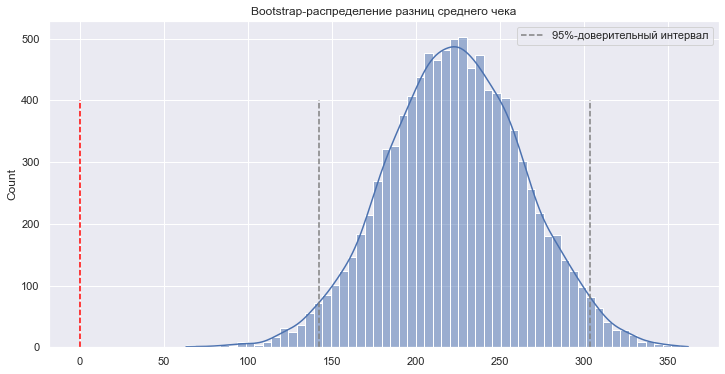

In [46]:
# гистограмма для всех платформ

sns.histplot(boot, kde=True) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

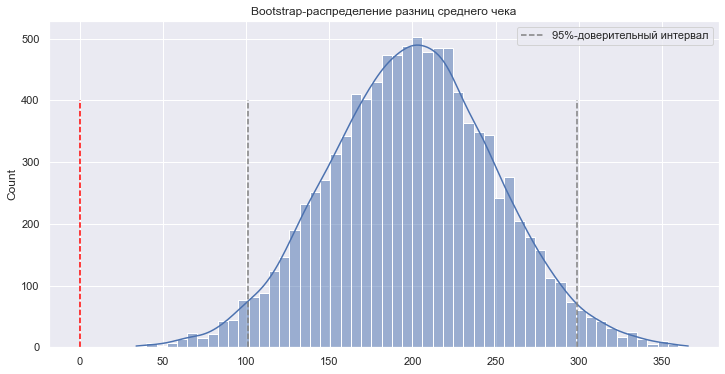

In [44]:
# гистограмма для PC

sns.histplot(boot_pc, kde=True) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_pc, # отрисуем перцентили
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

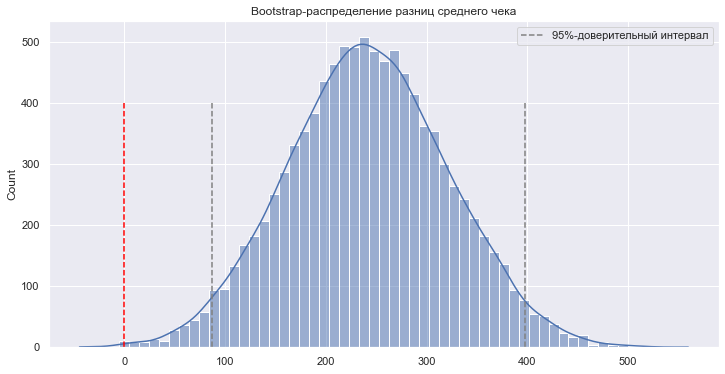

In [45]:
# гистограмма для Mobile

sns.histplot(boot_mobile, kde=True) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_mobile, # отрисуем перцентили
           ymin = 0, 
           ymax = 400, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Средний чек в тестовом варианте статистически значимо выше, чем в контрольном, как для отдельных платформ, так и в общем
</div>

---

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Средний чек в тестовой группе выше, уровень доверия к эксперименту высокий.<br>
Хотя, для мобильной платформы значение мощности недостаточное - т.е. мы слишком часто будем говорить о том, что разницы между группами не существует, когда на самом деле эта разница есть. Поэтому рекомендую пересмотреть сплитирование по используемой платформе для улучшения качества эксперимента.<br>
Тем не менее, протестированные изменения уже можно внедрить.
</div>

# 🎉🎉🎉 Поздравляем, ты великолепен! 